Which major has the lowest unemployment rate?

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 读取数据
all_ages_df = pd.read_csv('college-majors/all-ages.csv')

# 按失业率升序排列
sorted_all_ages_df = all_ages_df.sort_values(by='Unemployment_rate')

# 显示失业率最低的前三个专业
print(sorted_all_ages_df[['Major', 'Unemployment_rate']].head(3))


                                         Major  Unemployment_rate
26  EDUCATIONAL ADMINISTRATION AND SUPERVISION           0.000000
51      GEOLOGICAL AND GEOPHYSICAL ENGINEERING           0.000000
85                                PHARMACOLOGY           0.016111


Which major has the highest percentage of women?

In [8]:
import pandas as pd

# 读取数据
women_stem_df = pd.read_csv('college-majors/women-stem.csv')

# 排序数据，按女性比例降序排列
sorted_women_stem_df = women_stem_df.sort_values(by='ShareWomen', ascending=False)

# 显示女性比例最高的前三个专业
print(sorted_women_stem_df[['Major', 'ShareWomen']].head(3))


                                            Major  ShareWomen
74  COMMUNICATION DISORDERS SCIENCES AND SERVICES    0.967998
40                     MEDICAL ASSISTING SERVICES    0.927807
26                                        NURSING    0.896019


* Why do we often choose the median, rather than the mean, to describe the typical income of a group of people?

中位数不受极端值的影响
,平均值 由于容易受到极端数据的影响，可能不适合用来描述收入这类具有高度偏态的分布。
收入分布通常不对称
更能反映不均衡的收入差距
中位数收入通常被视为更合适的衡量标准，因为它代表了一个人在收入分布中的“中间位置”，是更符合实际的“典型收入”。

Major_category
Engineering    75000.0
Name: Median, dtype: float64


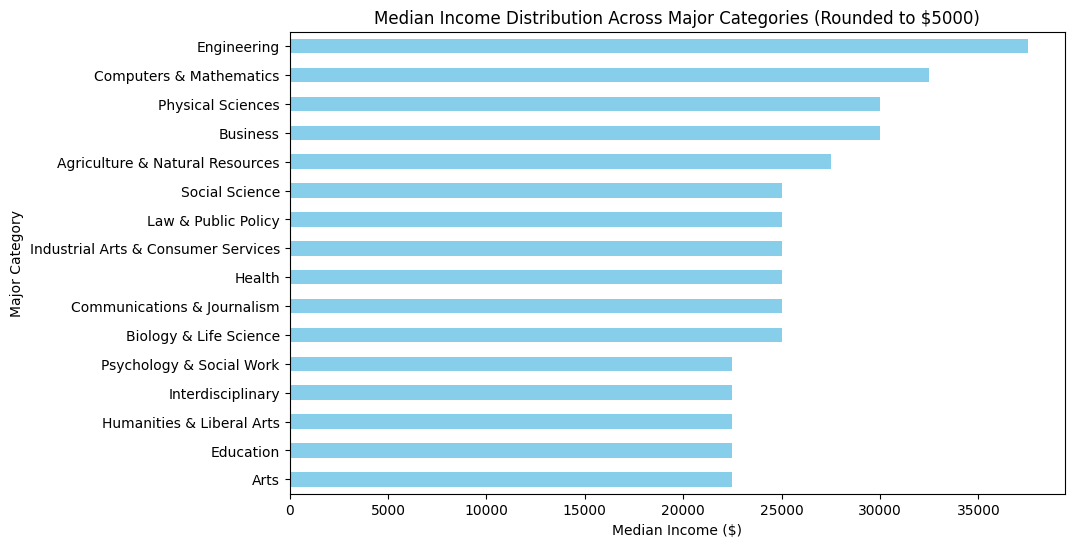

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
all_ages_df = pd.read_csv('college-majors/all-ages.csv')

# 根据专业类别分组，并计算每个类别的中位数收入
category_median_income = all_ages_df.groupby('Major_category')['Median'].median()


# 按照中位数收入从高到低排序
sorted_median_incomes = category_median_income.sort_values(ascending=False)


print(sorted_median_incomes.head(1))
# 将中位数收入四舍五入到5000的倍数
category_median_income_rounded = category_median_income.apply(lambda x: round(x / 5000) * 2500)

# 绘制专业类别的中位数收入分布
category_median_income_rounded.sort_values().plot(kind='barh', figsize=(10, 6), color='skyblue')

# 添加标题和标签
plt.title('Median Income Distribution Across Major Categories (Rounded to $5000)')
plt.xlabel('Median Income ($)')
plt.ylabel('Major Category')

# 显示图表
plt.show()


收入的范围比较宽，选择 $5000 作为 binwidth 可以平滑分布，使得我们能清楚地看到收入的主要分布趋势。
$1000 的 binwidth 可能会导致图表过于细化，显示的信息较多但不一定有助于分析整体分布。
$5000 的 binwidth 可以减少条形图上的冗余细节，同时仍能反映出收入的波动和分布。

In [10]:
# 根据专业类别分组，并计算每个类别的就业人数总和
category_employed = all_ages_df.groupby('Major_category')['Employed'].sum()

# 按照就业人数升序排序，找出最不受欢迎的专业类别
least_popular_category = category_employed.sort_values().head(1)

print("The least popular major category is:")
print(least_popular_category)


The least popular major category is:
Major_category
Interdisciplinary    35706
Name: Employed, dtype: int64


In [11]:
import pandas as pd


all_ages_df = pd.read_csv('college-majors/all-ages.csv')

# 创建一个 STEM 专业类别的列表
stem_categories = [
        'BIOLOGY', 'BIOCHEMICAL SCIENCES', 'BOTANY', 'MOLECULAR BIOLOGY', 'ECOLOGY', 'GENETICS', 'MICROBIOLOGY',
    'PHARMACOLOGY', 'PHYSIOLOGY', 'ZOOLOGY', 'NEUROSCIENCE', 'CHEMISTRY', 'ATMOSPHERIC SCIENCES AND METEOROLOGY',
    'GEOLOGY AND EARTH SCIENCE', 'OCEANOGRAPHY', 'PHYSICS', 'MATERIALS SCIENCE',
    'INFORMATION SCIENCES', 'COMPUTER PROGRAMMING AND DATA PROCESSING', 'BIOLOGICAL ENGINEERING', 
    'AEROSPACE ENGINEERING', 'BIOMEDICAL ENGINEERING', 'CHEMICAL ENGINEERING', 'CIVIL ENGINEERING',
    'COMPUTER ENGINEERING', 'ELECTRICAL ENGINEERING', 'ENGINEERING MECHANICS PHYSICS AND SCIENCE',
    'ENVIRONMENTAL ENGINEERING', 'GEOLOGICAL AND GEOPHYSICAL ENGINEERING', 'INDUSTRIAL AND MANUFACTURING ENGINEERING',
    'MATERIALS ENGINEERING AND MATERIALS SCIENCE', 'MECHANICAL ENGINEERING', 'METALLURGICAL ENGINEERING',
    'MINING AND MINERAL ENGINEERING', 'NAVAL ARCHITECTURE AND MARINE ENGINEERING', 'NUCLEAR ENGINEERING',
    'PETROLEUM ENGINEERING', 'MATHEMATICS', 'APPLIED MATHEMATICS', 'STATISTICS AND DECISION SCIENCE',
    'MATHEMATICS AND COMPUTER SCIENCE', 'COGNITIVE SCIENCE AND BIOPSYCHOLOGY'
]

all_ages_df['is_stem'] = all_ages_df['Major'].apply(lambda x: 1 if x in stem_categories else 0)

# 计算所有专业的中位收入
overall_median_income = all_ages_df['Median'].median()
print(overall_median_income)
# 筛选出 STEM 专业中，中位收入低于或等于所有专业中位收入的专业
stem_below_or_equal_median = all_ages_df[(all_ages_df['is_stem'] == 1) & (all_ages_df['Median'] <= overall_median_income)]

# 选择并显示专业名称、中位收入、第25百分位数和第75百分位数收入
result = stem_below_or_equal_median[['Major', 'Median', 'P25th', 'P75th']]

# 按照中位收入从高到低排序
result_sorted = result.sort_values(by='Median', ascending=False)


print(result_sorted)

53000.0
                                  Major  Median  P25th    P75th
79                 BIOCHEMICAL SCIENCES   53000  33000  82000.0
98  COGNITIVE SCIENCE AND BIOPSYCHOLOGY   53000  31500  93000.0
78                              BIOLOGY   51000  35000  80000.0
80                               BOTANY   50000  32000  75000.0
86                           PHYSIOLOGY   50000  30000  75000.0
83                             GENETICS   48000  33000  80000.0
82                              ECOLOGY   47500  32000  73000.0
81                    MOLECULAR BIOLOGY   45000  30000  70000.0
88                         NEUROSCIENCE   35000  28000  52000.0


   Rank  Major_code                                      Major Major_category  \
0     1        2419                      PETROLEUM ENGINEERING    Engineering   
1     2        2416             MINING AND MINERAL ENGINEERING    Engineering   
2     3        2415                  METALLURGICAL ENGINEERING    Engineering   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING    Engineering   
4     5        2418                        NUCLEAR ENGINEERING    Engineering   

   Total   Men  Women  ShareWomen  Median  
0   2339  2057    282    0.120564  110000  
1    756   679     77    0.101852   75000  
2    856   725    131    0.153037   73000  
3   1258  1123    135    0.107313   70000  
4   2573  2200    373    0.144967   65000  


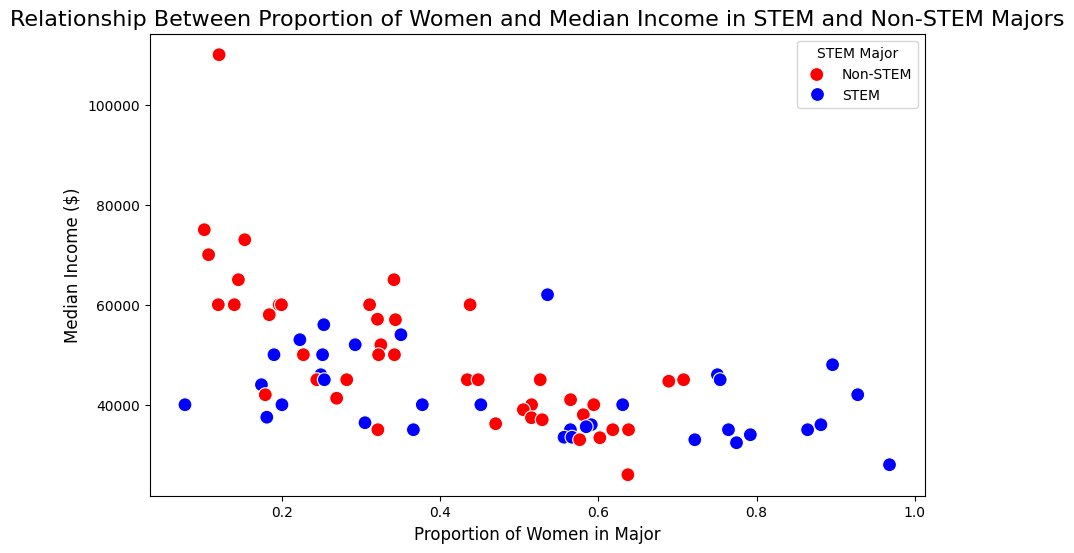

In [12]:

women_stem_df = pd.read_csv('college-majors/women-stem.csv')

# 查看数据结构，确保加载正确
print(women_stem_df.head())


#  添加一个新列标记专业是否为 STEM 专业
women_stem_df['is_stem'] = women_stem_df['Major'].apply(lambda x: 1 if x in stem_categories else 0)

#  绘制散点图
plt.figure(figsize=(10, 6))

# 根据是否为 STEM 专业进行颜色区分
sns.scatterplot(data=women_stem_df, x='ShareWomen', y='Median', hue='is_stem', palette={0: 'blue', 1: 'red'}, s=100)

# 设置图表标题和标签
plt.title('Relationship Between Proportion of Women and Median Income in STEM and Non-STEM Majors', fontsize=16)
plt.xlabel('Proportion of Women in Major', fontsize=12)
plt.ylabel('Median Income ($)', fontsize=12)

# 显示图例
plt.legend(title='STEM Major', labels=['Non-STEM', 'STEM'])

# 显示图表
plt.show()
